<a href="https://colab.research.google.com/github/eunho792/BIGDATA/blob/master/Baseball_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


picher = pd.read_csv('picher_stats_2017.csv')
batter = pd.read_csv('batter_stats_2017.csv')
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [ ]:
batter.columns
print(picher.shape)

picher['연봉(2017)'].describe()

(152, 22)


count       152.000000
mean      16505.263158
std       25046.478092
min        2700.000000
25%        3000.000000
50%        6000.000000
75%       15250.000000
max      150000.000000
Name: 연봉(2017), dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


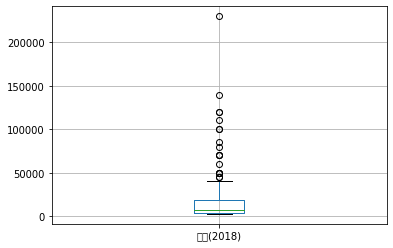

In [ ]:
picher.boxplot(column=['연봉(2018)'])

In [ ]:
# 그래프에서 한글 보이도록 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

# Runtime -> Restart runtime

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 회귀 분석에 사용할 피처 살펴보자
picher_feature_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54848 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_

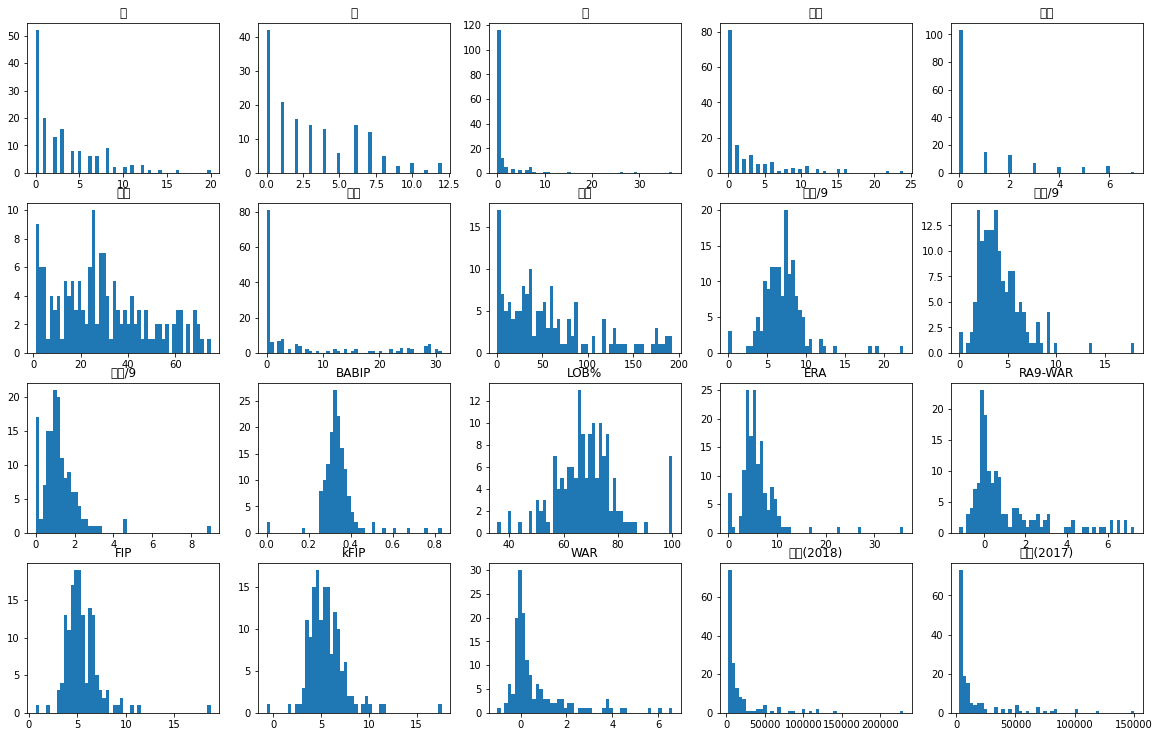

In [ ]:
# 피처 각각에 대한 히스토그램을 출력

def plot_hist_each_column(df):
  plt.rcParams['figure.figsize'] = [20,16]
  fig = plt.figure(1)

  # df 의 열 개수 만큼의 subplot을 출력한다. 

  for i in range(len(df.columns)):
    ax = fig.add_subplot(5, 5, i+1)
    plt.hist(df[df.columns[i]], bins=50)
    ax.set_title(df.columns[i])
  plt.show()

plot_hist_each_column(picher_feature_df)

# 각 피처들 간의 단위가 크게 다르다 0~8 , 0~200000 등등

In [ ]:
#step2

# 정규화 (스케일링)
# 피처들의 단위 맞춰주자 -> 피처 스케일링


# 피처 각각에 대한 스케일링 수행하는 함수 정의

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

# 피처 각각에 대한 스케일링 수행
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']

picher_df = standard_scaling(picher, scale_columns)


In [ ]:
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,3.912893,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,3.266495,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,6.821679,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,2.620098,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,2.975617,2.734705


In [ ]:
# 연속형이 아닌 범주형(카테고리형)피처들 정규화   -> 원-핫 인코딩 (one-hot encoding)
# 0.2, 1.2, 10, 100 ... 연속형 피처는 컴퓨터가 계산할수 있는 형태 그런데, 
# 과일 종류 같은 범주형 피처는 컴퓨터가 계산 할수 없다.이러한 피처들은 컴퓨터가 이해할수 있는 형태로
# 변경해야한다. 가장 대표적인 변환 방식이 원-핫 인코딩 방식이다. 

# 팀명 피처를 ont - hot encoding 으로 변환
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
team_encoding.head()


KeyError: ignored

In [ ]:
# 학습데이터와 테스트 데이터로 분리 

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=19)



In [ ]:
# 회귀 분석 계수 학습 & 학습된 계수 출력 (회귀 모델 학습)

Ir = linear_model.LinearRegression()
model = Ir.fit(X_train, y_)
print(lr.coef_)

NameError: ignored

In [ ]:
###########################################
# step 3 평가 
###########################################


# 어떤 피처가 가장 영향력이 강한 피처일까? 

import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()


# R-squared 결정계수     0.928
# Adj. R-squared 수정결정계수 0.907
# F-statistic F통계량 은 Prob (F-statistic) 함께 봐야 한다. 
# 일반적으로 0.05 이하이며 이면 F통계량이 유의한 의미를 가진다. 

# 회귀분석이 얼마나 잘 되었지 평가하는 지표
# 회귀분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가 
# 1에 가까울수록 데이터를 잘 설명하는 모델이다. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           7.70e-42
Time:                        08:15:49   Log-Likelihood:                 3.3433
No. Observations:                 121   AIC:                             49.31
Df Residuals:                      93   BIC:                             127.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0085      0.023     -0.376      0.708      -0.053       0.036
BABIP         -0.0479      0.042     -1.145      0.255      -0.131       0.035
ERA           -0.0135      0.075     -0.179      0.858      -0.163       0.136
FIP           -3.0425      3.048     -0.998      0.321      -9.094       3.009
KIA           -0.0514      0.072     -0.716      0.476      -0.194       0.091
KT             0.0499      0.069      0.723      0.471      -0.087       0.187
LG            -0.0251      0.078     -0.323      0.747      -0.179       0.129
LOB%          -0.0445      0.051     -0.879      0.382      -0.145       0.056
NC            -0.0179      0.086     -0.208      0.836      -0.189       0.153
RA9-WAR        0.1280      0.095      1.351      0.180      -0.060       0.316
SK             0.0281      0.073      0.387      0.699      -0.116       0.172
WAR            0.3320      0.082      4.057      0.000       0.169       0.495
kFIP           2.5104      2.570      0.977      0.331      -2.594       7.615
경기            -0.0787      0.095     -0.824      0.412      -0.268       0.111
두산            -0.0298      0.084     -0.356      0.723      -0.196       0.136
롯데             0.0136      0.083      0.164      0.870      -0.151       0.178
볼넷/9           0.2460      0.203      1.213      0.228      -0.157       0.649
블론             0.0411      0.040      1.023      0.309      -0.039       0.121
삼성            -0.0918      0.080     -1.144      0.256      -0.251       0.068
삼진/9           0.1744      0.235      0.741      0.461      -0.293       0.642
선발            -0.1550      0.177     -0.874      0.384      -0.507       0.197
세             -0.0081      0.042     -0.194      0.847      -0.091       0.075
승              0.0076      0.072      0.107      0.915      -0.135       0.150
연봉(2017)       0.6183      0.041     15.055      0.000       0.537       0.700
이닝             0.0276      0.214      0.129      0.898      -0.398       0.453
패              0.0421      0.063      0.672      0.503      -0.082       0.166
한화             0.1159      0.071      1.641      0.104      -0.024       0.256
홀드            -0.0302      0.053     -0.571      0.569      -0.135       0.075
홈런/9           0.5864      0.542      1.082      0.282      -0.490       1.663
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.77e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is